# Risk benefits of online $\rho$ modulation

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import sys
import os

path1 = ".."
sys.path.insert(1, os.path.join(sys.path[0], path1))
import opal
from opal import OpAL
import learning
import plot_dynamics

In [2]:
import importlib
importlib.reload(opal)

<module 'opal' from '/Users/ajaskir/Desktop/FYP/opal/notebooks/../opal.py'>

In [3]:
# initialize parameters
alpha_c = 0.01 # not used
alpha_a = .1
beta = 5
params = (alpha_c,alpha_a, beta)

k = 10
T = 10
phi = 1.5

n_sims = 1000
n_trials = 50
# v0 = np.array([0.,0.]) # only for Bayes SA
v0 = 0.
rho = 0.0

crit = "S"  # only one option, go-gamble, no go-don't gambel, so set to "S"

# annealing
anneal = True
use_var = True 
mag = 2

plot_all = True
plt.rcParams.update({'font.size': 22})

## High Probabiltiy Gambles

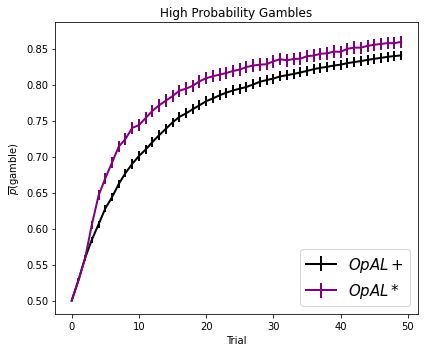

In [4]:
env = "high"
rnd_seeds_H = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance
H_states_zero = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod="constant",k=k,norm=True,mag=mag,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)
H_states_val = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod="beta",k=k,norm=True,mag=mag,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamics.avg_sm(H_states_zero,n_trials,n_sims,0,axs,"black")
plot_dynamics.avg_sm(H_states_val,n_trials,n_sims,0,axs,"purple")
plt.legend(("$OpAL+$", "$OpAL*$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("High Probability Gambles")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}$(gamble)")
plt.tight_layout()

In [5]:
idx = 1
print(H_states_val[idx].C)
print(H_states_val[idx].beta_dist)
print(H_states_val[idx].mean)
print(H_states_val[idx].rho)

[0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [24.  1.]
 [25.  1.]
 [26.  1.]
 [27.  1.]
 [28.  1.]
 [29.  1.]
 [30.  1.]
 [31.  1.]
 [32.  1.]
 [33.  1.]
 [34.  1.]
 [35.  1.]
 [36.  1.]
 [37.  1.]
 [38.  1.]
 [39.  1.]
 [40.  1.]
 [41.  1.]
 [42.  1.]
 [43.  1.]
 [44.  1.]
 [45.  1.]
 [46.  1.]
 [47.  1.]]
[0.5        0.5        0.5        0.5        0.66666667 0.66666667
 0.75       0.8        0.83333333 0.85714286 0.875      0.88888889
 0.9        0.90909091 0.91666667 0.92307692 0.92857143 0.93333333
 0.9375     0.94117647 0.94444444 0.94736842 0.95       0.95238095
 0.95454545 0.95652174 0.95833333 0.96       0.96153846 0.96296296


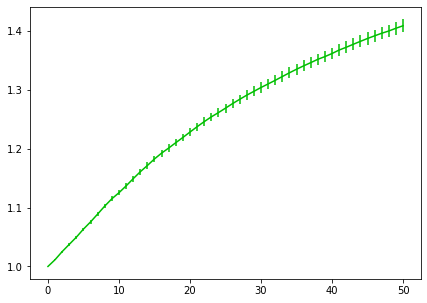

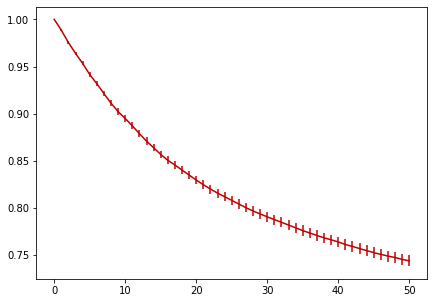

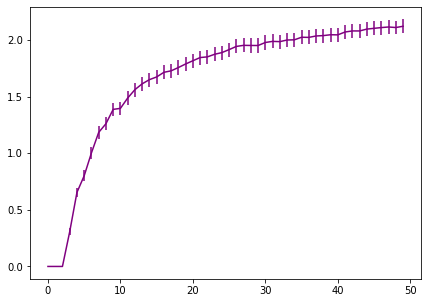

In [6]:
if plot_all:
    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
    # fig3, ax3 = plt.subplots(figsize=(7, 5)) # critic
    fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho
    axs = [ax1,ax2]
    plot_dynamics.avg_qs(H_states_val,n_trials,n_sims,0,axs,.75)
    # plot_dynamics.avg_vs(H_states_val,n_trials,n_sims,crit,0,ax3,.75)
    plot_dynamics.avg_rho(H_states_val,n_trials,n_sims,ax4)

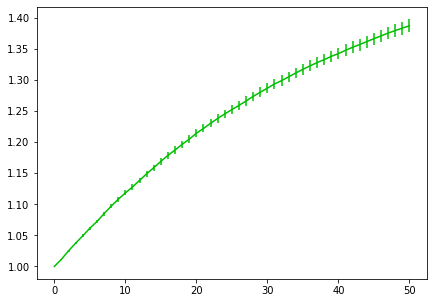

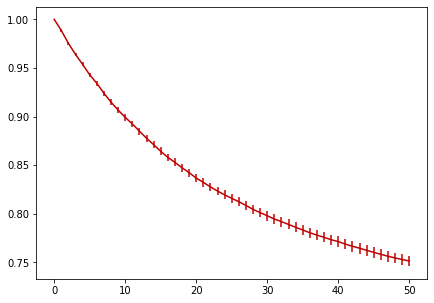

In [7]:
if plot_all:
    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
    # fig3, ax3 = plt.subplots(figsize=(7, 5)) # critic
    axs = [ax1,ax2]
    plot_dynamics.avg_qs(H_states_zero,n_trials,n_sims,0,axs,.75)
    # plot_dynamics.avg_vs(H_states_zero,n_trials,n_sims,crit,0,ax3,.75)

## Low Probability Gambles

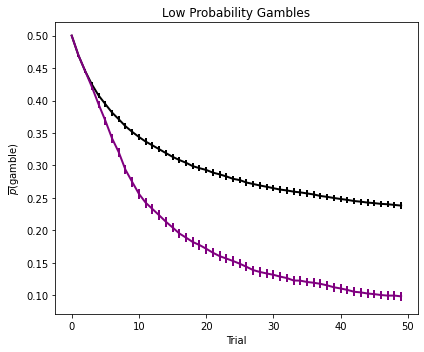

In [8]:
env = "low"
rnd_seeds_L = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance
L_states_zero = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod="constant",k=k,norm=True,mag=mag,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)
L_states_val = learning.simulate(params,n_sims,n_trials,v0=v0,crit=crit,env=env,mod="beta",k=k,norm=True,mag=mag,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamics.avg_sm(L_states_zero,n_trials,n_sims,0,axs,"black")
plot_dynamics.avg_sm(L_states_val,n_trials,n_sims,0,axs,"purple")
# plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Low Probability Gambles")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}$(gamble)")
plt.tight_layout()

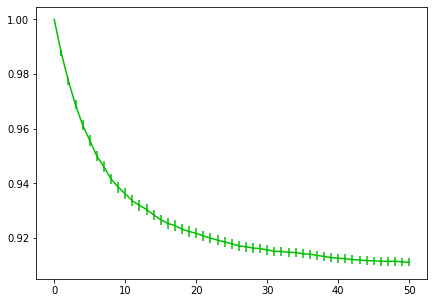

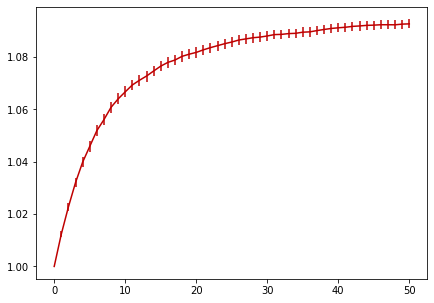

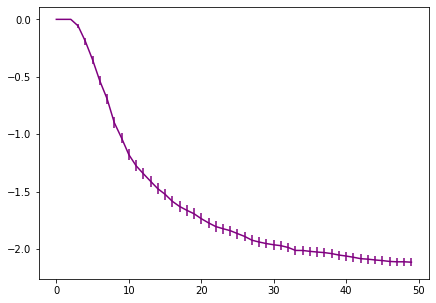

In [9]:
if plot_all:
    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
    # fig3, ax3 = plt.subplots(figsize=(7, 5)) # critic
    fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho
    axs = [ax1,ax2]
    plot_dynamics.avg_qs(L_states_val,n_trials,n_sims,0,axs,.75)
    # plot_dynamics.avg_vs(L_states_val,n_trials,n_states,crit,0,ax3,.75)
    plot_dynamics.avg_rho(L_states_val,n_trials,n_sims,ax4)

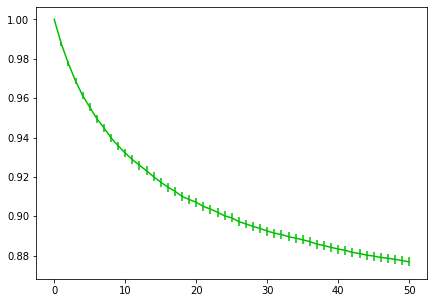

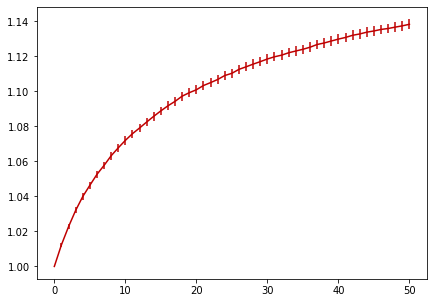

In [10]:
if plot_all:
    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
    # fig3, ax3 = plt.subplots(figsize=(7, 5)) # critic
    axs = [ax1,ax2]
    plot_dynamics.avg_qs(L_states_zero,n_trials,n_sims,0,axs,.75)
    # plot_dynamics.avg_vs(L_states_zero,n_trials,n_sims,crit,0,ax3,.75)
    plot_dynamics.avg_rho(L_states_zero,n_trials,n_sims,ax4)

# Magnitude manipulations

In [11]:
env = "highMag"
rnd_seeds_H = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance
H_states_zero = learning.simulate(params,n_sims,n_trials,v0=v0,crit="Bayes-SA",env=env,mod="constant",k=k,norm=True,mag=3,anneal=True,T=T,use_std=False,exp_val=False,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)
H_states_val = learning.simulate(params,n_sims,n_trials,v0=v0,crit="Bayes-SA",env=env,mod="beta",k=k,norm=True,mag=3,anneal=True,T=T,use_std=False,exp_val=False,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_H, gamble=True)

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamics.avg_sm(H_states_zero,n_trials,n_sims,0,axs,"black")
plot_dynamics.avg_sm(H_states_val,n_trials,n_sims,0,axs,"purple")
plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("High Magnitude Gambles")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}$(gamble)")
plt.tight_layout()

TypeError: simulate() got an unexpected keyword argument 'use_std'

In [ ]:
print(np.mean([np.mean(state.PE) for state in L_states_zero]))
print(np.mean([np.mean(state.PE) for state in H_states_zero]))

-0.018583928262060418
-0.032265609067480966


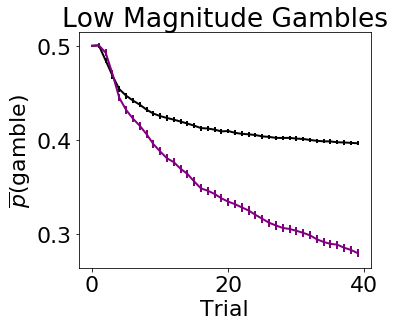

In [ ]:
env = "lowMag"
rnd_seeds_L = np.random.randint(1,100000,n_sims)      # use same random seed to limit variance
L_states_zero = learning.simulate(params,n_sims,n_trials,v0=v0,crit="Bayes-SA",env=env,mod="constant",k=k,norm=True,mag=1,anneal=True,T=T,use_std=False,exp_val=False,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_L, gamble=True)
L_states_val = learning.simulate(params,n_sims,n_trials,v0=v0,crit="Bayes-SA",env=env,mod="beta",k=k,norm=True,mag=1,anneal=True,T=T,use_std=False,exp_val=False,phi=phi,r_mag=1,l_mag=-1,hebb=True, rnd_seeds = rnd_seeds_L, gamble=True)

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamics.avg_sm(L_states_zero,n_trials,n_sims,0,axs,"black")
plot_dynamics.avg_sm(L_states_val,n_trials,n_sims,0,axs,"purple")
# plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Low Magnitude Gambles")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}$(gamble)")
plt.tight_layout()

In [ ]:
 # plot dynamics for val mod
plotme = H_states_zero
fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go
fig3, ax3 = plt.subplots(figsize=(7, 5)) # critic
fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho
axs = [ax1,ax2]
plot_dynamics.avg_qs(plotme,n_trials,n_sims,0,axs,.75)
plot_dynamics.avg_vs(plotme,n_trials,n_sims,crit,0,ax3,.75)
plot_dynamics.avg_rho(plotme,n_trials,n_sims,ax4)

NameError: name 'H_states_zero' is not defined